In [17]:
%pip install PyWavelets


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pywt

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
# Load an example image
image_path = "images/lena.jpeg"  # Replace with the actual path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Original Image')

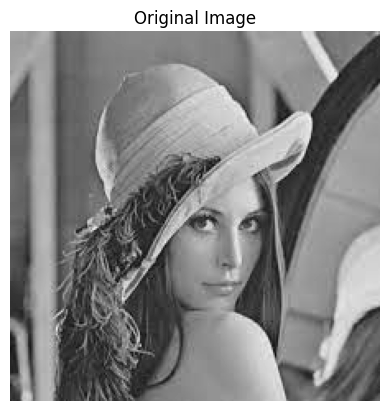

In [21]:

# Display the original image
plt.imshow(original_image, cmap= 'gray')
plt.axis('off')
plt.title('Original Image')

In [22]:
# Function to perform Discrete Cosine Transform (DCT)
def dct_transform(image):
    transformed_image = cv2.dct(np.float32(image))
    return transformed_image, "DCT Transform"

In [23]:
# Function to perform Discrete Wavelet Transform (DWT)
def dwt_transform(image):
    # Apply 2D discrete wavelet transform
    coeffs = pywt.dwt2(image, 'haar')

    # Return the LL (approximation), LH (horizontal detail), HL (vertical detail), and HH (diagonal detail) coefficients
    return coeffs, 'DWT Transform'



In [24]:
# Function to perform Fourier Transform
def fourier_transform(image):
    transformed_image = np.fft.fft2(image)
    return np.fft.fftshift(transformed_image), "Fourier Transform"



In [25]:
def reconstruct_image(transformed_image, transform_type):
    if transform_type == "DCT Transform":
        reconstructed_image = cv2.idct(transformed_image)

    elif transform_type == "DWT Transform":
      # Apply 2D inverse discrete wavelet transform
      reconstructed_image = pywt.idwt2(transformed_image, 'haar')

    elif transform_type == "Fourier Transform":
        reconstructed_image = np.fft.ifft2(np.fft.ifftshift(transformed_image)).real


    return reconstructed_image

In [26]:
# Apply transformations
transform_functions = [dct_transform,   fourier_transform, dwt_transform,]

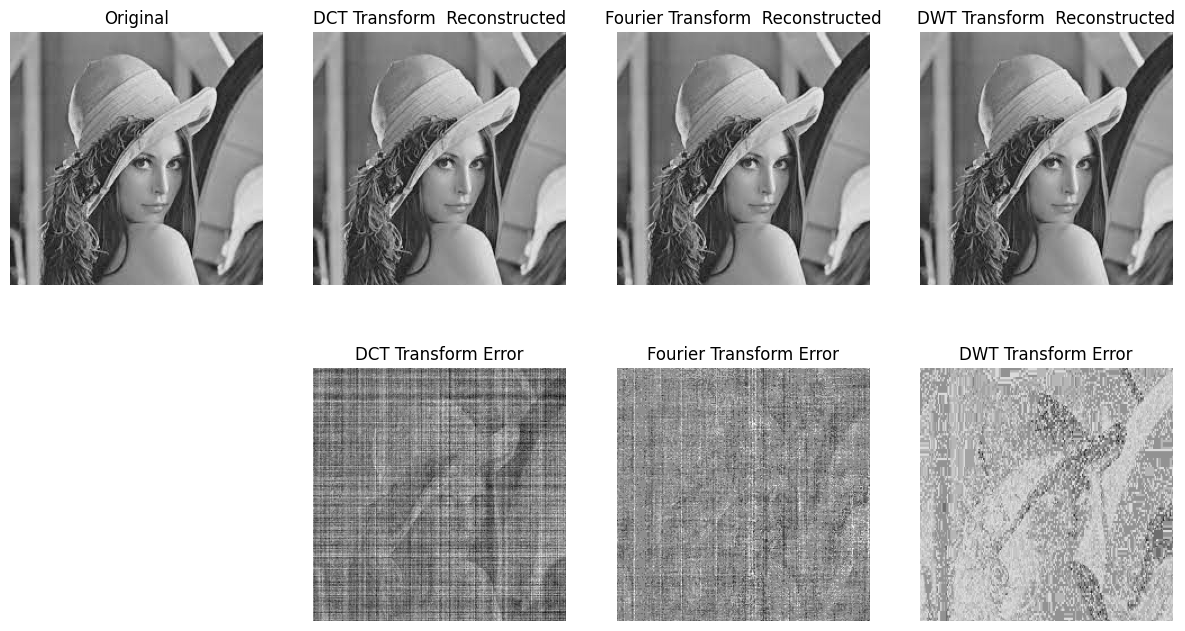

In [27]:
plt.figure(figsize = (15, 8))
# plt.tight_layout()
i = 2
plt.subplot(2, 4, 1)
plt.imshow(original_image, cmap = 'gray')
plt.title("Original")
plt.axis('off')
reconstructed_image = ''
for transform_function in transform_functions:
    transformed_image, description = transform_function(original_image)
    # Scale the pixel values to the range [0, 255] for proper display

    # Reconstruct the image from the transformed coefficients
    reconstructed_image = reconstruct_image(transformed_image, description)

    #he DWT process often results in images with dimensions that are not exactly divisible by 2 (due to the wavelet decomposition process).

    reconstructed_image = reconstructed_image[:original_image.shape[0], :original_image.shape[1]]



    # Display the reconstructed image
    plt.subplot(2, 4, i)
    plt.imshow(reconstructed_image, cmap = 'gray')
    plt.title(f"{description}  Reconstructed")
    plt.axis('off')


    # Display the reconstructed image error
    plt.subplot(2, 4, i+4)
    plt.imshow(original_image-reconstructed_image, cmap= 'gray')
    plt.title(f"{description} Error")
    plt.axis('off')


    i=i+1
    # show_image(reconstructed_image, title=f"{description} - Reconstructed", )